<a href="https://colab.research.google.com/github/LeTranDinhTruc/Final_term_AI/blob/main/Final_term_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

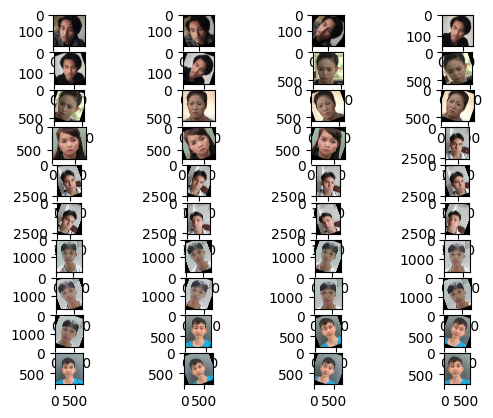

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
folder = '/content/drive/MyDrive/AI/hinh_train_AI/cam_xuc_1/train/'

for i in range(40):
  plt.subplot(10,4,i+1)
  filename1 = folder + 'buon ('+ str(i+1)+').jpg'
  img1 = plt.imread(filename1)
  plt.imshow(img1)
plt.show()

In [ ]:
#include library
from os import listdir 
from os.path import isdir
from numpy import asarray
from numpy import save
from keras.utils import load_img, img_to_array
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [ ]:
output = 0.0
train_photos,train_labels = list(),list()
test_photos,test_labels = list(),list()

#get photos to train
folder = '/content/drive/MyDrive/AI/hinh_train_AI/cam_xuc_1/train/'
# label train data
for file in listdir(folder):
  if file.startswith('vui'):
    output = 0 
  if file.startswith('buon'):
    output = 1
  if file.startswith('tuc_gian'):
    output = 2
  if file.startswith('so_hai'):
    output = 3
  if file.startswith('ghe_tom'):
    output = 4
  if file.startswith('khinh_bi'):
    output = 5
  if file.startswith('ngac_nhien'):
    output = 6
  # load and resize data
  img = load_img(folder + file,target_size=(100,100))
  # convert photo to array
  photo = img_to_array(img)
  # store input images and labels
  train_photos.append(photo)
  train_labels.append(output)

train_photos = asarray(train_photos)
train_labels = asarray(train_labels)
print(train_photos.shape,train_labels.shape)

# save two array
save('/content/drive/MyDrive/AI/hinh_train_AI/cam_xuc_1/train_photos.npy',train_photos)
save('/content/drive/MyDrive/AI/hinh_train_AI/cam_xuc_1/train_labels.npy',train_labels)

(784, 100, 100, 3) (784,)


In [ ]:
#get photo to test
folder = '/content/drive/MyDrive/AI/hinh_train_AI/cam_xuc_1/test/'
# label train data
for file in listdir(folder):
  if file.startswith('vui'):
    output = 0 
  if file.startswith('buon'):
    output = 1
  if file.startswith('tuc_gian'):
    output = 2
  if file.startswith('so_hai'):
    output = 3
  if file.startswith('ghe_tom'):
    output = 4
  if file.startswith('khinh_bi'):
    output = 5
  if file.startswith('ngac_nhien'):
    output = 6
  # load and resize data
  img = load_img(folder + file,target_size=(100,100))
  # convert photo to array
  photo = img_to_array(img)
  # store input images and labels
  test_photos.append(photo)
  test_labels.append(output)
test_photos = asarray(test_photos)
test_labels = asarray(test_labels)
print(test_photos.shape,test_labels.shape)

# save two array
save('/content/drive/MyDrive/AI/hinh_train_AI/cam_xuc_1/test_photos.npy',test_photos)
save('/content/drive/MyDrive/AI/hinh_train_AI/cam_xuc_1/test_labels.npy',test_labels)

(265, 100, 100, 3) (265,)


In [ ]:
#start training data
import numpy as np
x_train = np.load('/content/drive/MyDrive/AI/hinh_train_AI/cam_xuc_1/train_photos.npy')
y_train = np.load('/content/drive/MyDrive/AI/hinh_train_AI/cam_xuc_1/train_labels.npy')
x_test = np.load('/content/drive/MyDrive/AI/hinh_train_AI/cam_xuc_1/test_photos.npy')
y_test = np.load('/content/drive/MyDrive/AI/hinh_train_AI/cam_xuc_1/test_labels.npy')
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

#preprocessing
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Normalization, LeakyReLU
from keras.optimizers import Adam

y_train = to_categorical(y_train,7)
y_test = to_categorical(y_test,7)
#create model
model = Sequential()

# take characteristics of image
# create 32 layers convolution + max pooling
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(100,100,3),padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))

# create 64 layers convolution + max pooling
model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))

# create 128 layers convolution + max pooling
model.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))

# create 256 layers convolution + max pooling
model.add(Conv2D(256,kernel_size=(3,3),activation='relu',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))

# create 512 layers convolution + max pooling
model.add(Conv2D(512,kernel_size=(3,3),activation='relu',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))

# Create layer for neuron network
model.add(Flatten())
model.add(Dense(128,activation = 'relu'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(64,activation = 'relu'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(7,activation='softmax'))

# train model
from keras.losses import categorical_crossentropy
model.compile(loss=categorical_crossentropy,optimizer=Adam(),metrics=['accuracy'])
model.summary()
train = model.fit(x_train,y_train, batch_size=64,epochs=100,verbose=1)
test_loss,test_acc=model.evaluate(x_test,y_test)
print('mat mat:',test_loss)
print('do chinh xac:',test_acc)
print(y_train)

(784, 100, 100, 3)
(784,)
(265, 100, 100, 3)
(265,)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 32)      896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 100, 100, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 50, 50, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 50, 50, 64)        0         
    

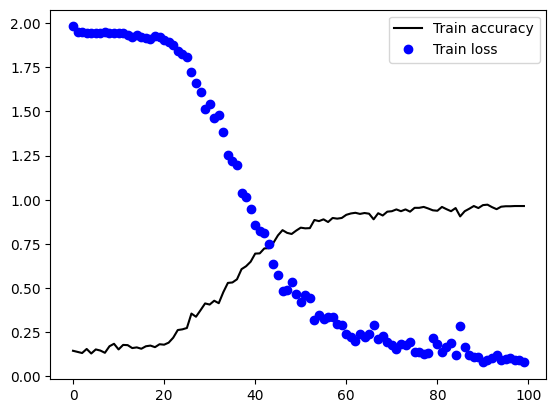

In [ ]:
accuracy = train.history['accuracy']
loss = train.history['loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'k', label = 'Train accuracy')
plt.plot(epochs, loss, 'bo', label = 'Train loss')
plt.legend(['Train accuracy', 'Train loss'])
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/AI/hinh_train_AI/cam_xuc_1/cam_xuc.h5')

9/9 [==============================] - 0s 10ms/step - loss: 9.9296 - accuracy: 0.2453
mat mat: 9.929591178894043
do chinh xac: 0.24528302252292633
1/1 [==============================] - 0s 309ms/step


'vui'

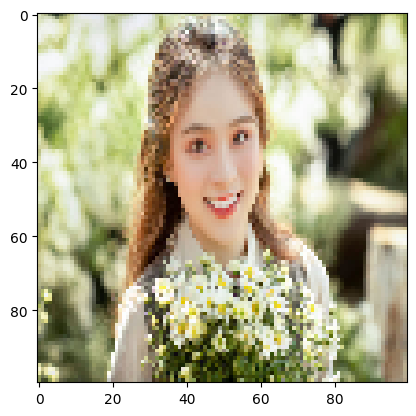

In [ ]:
from keras.models import load_model
#test of saved model
model=load_model('/content/cam_xuc_1.h5')
x_test = np.load('/content/drive/MyDrive/AI/hinh_train_AI/cam_xuc_1/test_photos.npy')
y_test = np.load('/content/drive/MyDrive/AI/hinh_train_AI/cam_xuc_1/test_labels.npy')
x_test = x_test.astype('float32')/255
y_test = to_categorical(y_test,7)
test_loss,test_acc=model.evaluate(x_test,y_test)
print('mat mat:',test_loss)
print('do chinh xac:',test_acc)

#using model
import matplotlib.pyplot as plt
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
import numpy as np
Cam_xuc = {0:'vui',1:'buon', 2:'tuc_gian', 3:'so_hai', 4:'ghe_tom',5:'khinh_bi',6:'ngac_nhien'} 
img = load_img("/content/anh-cuoi-dep-800x545.jpg",target_size=(100,100))
plt.imshow(img)
img = img_to_array(img)
img=img.reshape(1,100,100,3)
img = img.astype('float32')
img =img/255
result  = np.argmax(model.predict(img),axis=1)
Cam_xuc[result[0]]